/tmp/ipykernel_118/1690828078.py:107: UserWarning: No contour levels were found within the data range.
  ax.contour(rx,ry, pot,levels = levels, cmap = colors[i])


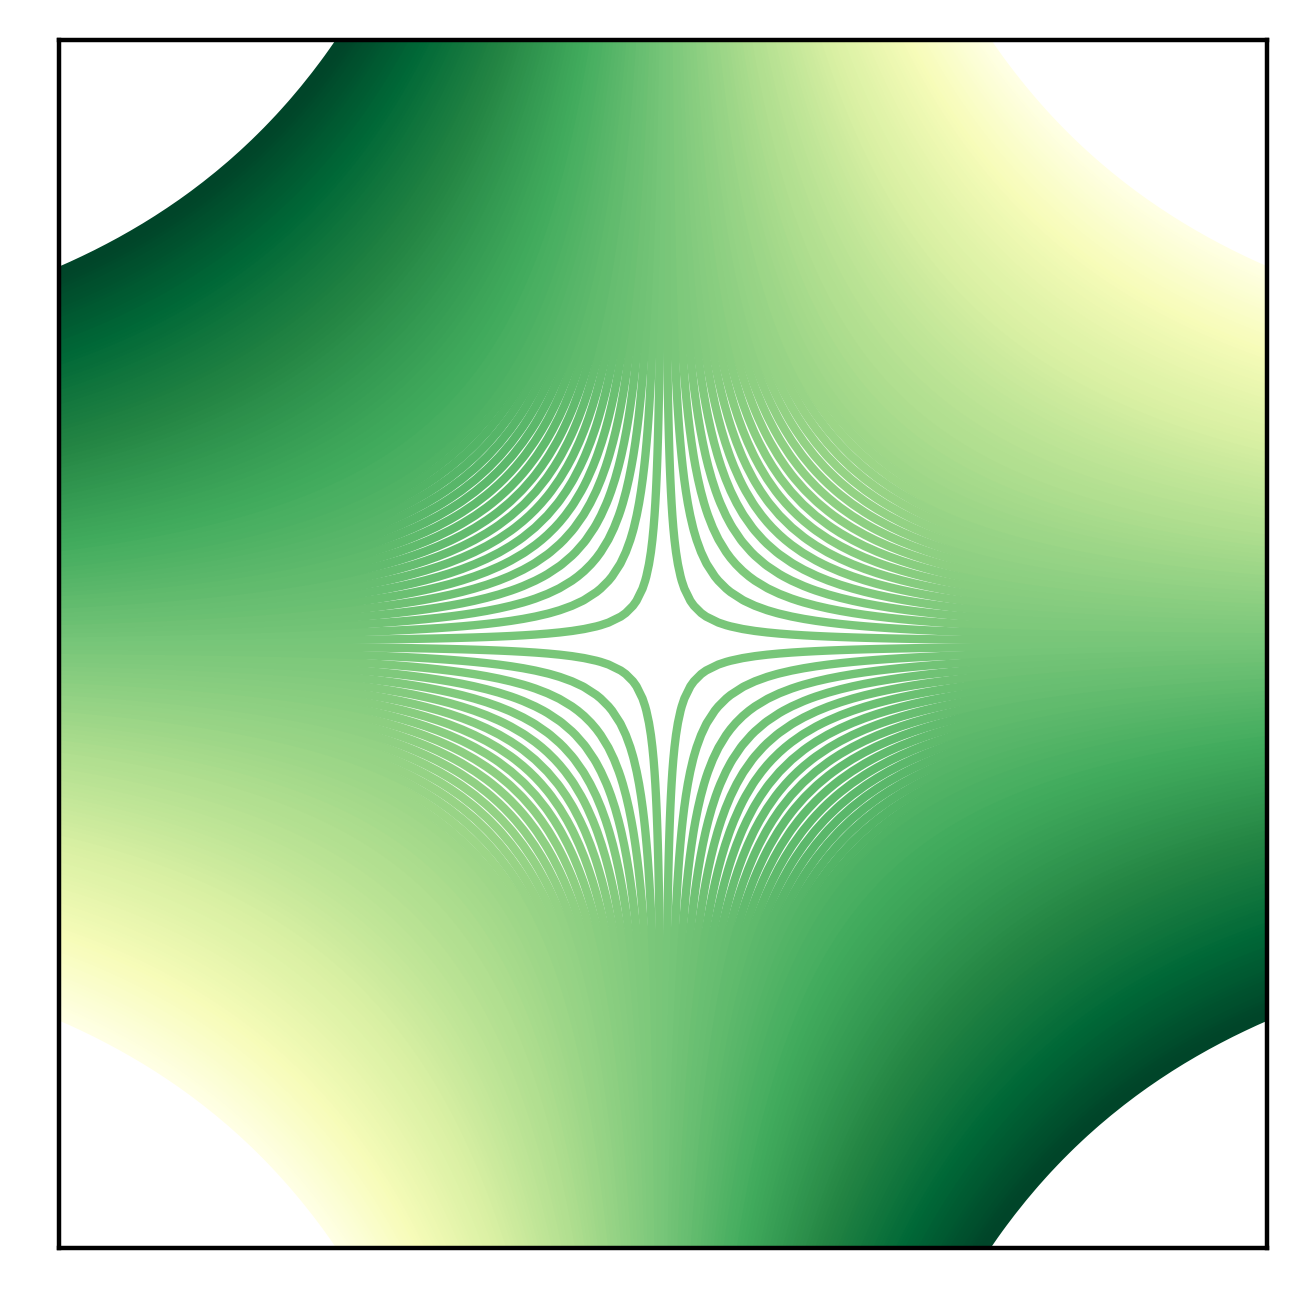

In [1]:
from matplotlib import animation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mco
import random

x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
rx, ry = np.meshgrid(x,y)
q = 1
phase1 = 400
phase2 = 160
frames = phase1 + phase2


##array für ladung in der mitte

params = np.zeros(phase1)
    
b = 0   
for i in range (phase2):
    params = np.append(params,b)
    b += 0.01

    
##Bewegung der vier äußeren Ladungen

##Rotation
        
a = np.linspace(0,2*np.pi,phase1) 

##dannach still
a = np.append(a,np.zeros(phase2))

##Betrag der vier äußeren Ladungen
qa = np.zeros(phase1) + 1
qa = np.append(qa,np.linspace(1,-20,phase2))



###Ladungen die random reinspawnen

d = np.linspace(-4,4,frames)  



    

        
def potential(a,d,x,y,b,qa):
    return   0.5/np.sqrt((x-d)**2+(y-d)**2) \
             +0.5/np.sqrt((x+d)**2+(y+d)**2) \
             -0.5/np.sqrt((x+d)**2+(y-d)**2) \
             -0.5/np.sqrt((x-d)**2+(y+d)**2) \
            + qa/(np.sqrt(((x+b + 0.5*np.sin(a))**2 + (y+b + 0.5*np.cos(a))**2))) \
            + qa/(np.sqrt(((x-b - 0.5*np.sin(a))**2 + (y-b - 0.5*np.cos(a))**2))) \
            - qa/(np.sqrt(((x+b + 0.5*np.sin(a))**2 + (y-b - 0.5*np.cos(a))**2))) \
            - qa/(np.sqrt(((x-b - 0.5*np.sin(a))**2 + (y+b + 0.5*np.cos(a))**2)))


q1 = np.linspace(-1,1,frames)
        
levels = np.linspace(-4,4,200)

fig = plt.figure(dpi = 400)

ax = plt.axes()
plt.axis('off')
ax.set_aspect('equal')
line, = ax.plot([], [], lw=2)


###cmaps

cmaps = [ 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn', 'viridis', 'plasma', 'inferno', 'magma', 'cividis','flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar']

colors = np.array([])

count = (int)(frames/10)

for i in range (count):
    array = np.full(10,random.choice(cmaps))
    colors = np.append(colors,array)


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    
    pot = potential(a[i],d[i],rx,ry,params[i],qa[i])
    
    ax.clear()
    
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.contour(rx,ry, pot,levels = levels, cmap = colors[i])
    
    
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('funkypotential2.mp4', fps=20, extra_args=['-vcodec', 'libx264'])

plt.show()